<a href="https://colab.research.google.com/github/manishkolla/Zillow-Home-Value-Prediction/blob/Prototypes/Modeling_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
#reading the csv files
bedroom1=pd.read_csv("drive/MyDrive/FDS project/1Bed_county.csv")
bedroom2=pd.read_csv("drive/MyDrive/FDS project/2Bed_county.csv")
bedroom3=pd.read_csv("drive/MyDrive/FDS project/3Bed_county.csv")
bedroom4=pd.read_csv("drive/MyDrive/FDS project/4Bed_county.csv")
bedroom5=pd.read_csv("drive/MyDrive/FDS project/5Bed_county.csv")
df1 = pd.DataFrame(bedroom1)
df2 = pd.DataFrame(bedroom2)
df3 = pd.DataFrame(bedroom3)
df4 = pd.DataFrame(bedroom4)
df4 = pd.DataFrame(bedroom4)
df5=  pd.DataFrame(bedroom5)

The sizes of the datasets are:
Dataset 1 with 1 bedroom houses:
Rows: 1490, Columns: 294
108 columns with null values greater than 50%
The years with those null values are from 2000-2008
4 columns with null values greater than 65%
The months of these null values from Jan 2000 till April 2000.
Dataset 2 with 2 bedroom houses:
Rows: 2532, Columns: 294
107 columns with null values greater than 50%
The years with those null values are from 2000-2008
0 columns with null values greater than 65%
Dataset 3 with 3 bedroom houses:
Rows: 2805, Columns: 294
107 columns with null values greater than 50%
The years with those null values are from 2000-2008
0 columns with null values greater than 65%
Dataset 4 with 4 bedroom houses:
Rows: 2522, Columns: 294
98 columns with null values greater than 50%
The years with those null values are from 2000-2008
0 columns with null values greater than 65%
Dataset 5 with 5 bedroom houses:
Rows: 1815, Columns: 294
77 columns with null values greater than 50%
The years with those null values are from 2000-2006
0 columns with null values greater than 65%


In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(1490, 294)
(2532, 294)
(2805, 294)
(2522, 294)
(1815, 294)


 Each individual dataset has all the 51 US states and the merged dataset has 1684 unique counties.


In [ ]:
print(df1.columns)
print(df1["RegionID"].unique())
print(len(df3["RegionID"].unique()))
print(df1["State"].nunique())

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2000-01-31',
       ...
       '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
      dtype='object', length=294)
[3101  139 1090 ... 2366 1925 1933]
2805
51


In [ ]:
def null(df):
  print(len(df.columns[(df.isnull().sum() / len(df)) > 0.5]))
null(df1)
null(df2)
null(df3)
null(df4)
null(df5)

108
107
107
98
77


In [ ]:
def null(df):
  print(len(df.columns[(df.isnull().sum() / len(df)) > 0.65]))
null(df1)
null(df2)
null(df3)
null(df4)
null(df5)

4
0
0
0
0


In [ ]:
print(df1[df1.duplicated()])
print(df2[df2.duplicated()])
print(df3[df3.duplicated()])
print(df4[df4.duplicated()])
print(df5[df5.duplicated()])

Empty DataFrame
Columns: [RegionID, SizeRank, RegionName, RegionType, StateName, State, Metro, StateCodeFIPS, MunicipalCodeFIPS, 2000-01-31, 2000-02-29, 2000-03-31, 2000-04-30, 2000-05-31, 2000-06-30, 2000-07-31, 2000-08-31, 2000-09-30, 2000-10-31, 2000-11-30, 2000-12-31, 2001-01-31, 2001-02-28, 2001-03-31, 2001-04-30, 2001-05-31, 2001-06-30, 2001-07-31, 2001-08-31, 2001-09-30, 2001-10-31, 2001-11-30, 2001-12-31, 2002-01-31, 2002-02-28, 2002-03-31, 2002-04-30, 2002-05-31, 2002-06-30, 2002-07-31, 2002-08-31, 2002-09-30, 2002-10-31, 2002-11-30, 2002-12-31, 2003-01-31, 2003-02-28, 2003-03-31, 2003-04-30, 2003-05-31, 2003-06-30, 2003-07-31, 2003-08-31, 2003-09-30, 2003-10-31, 2003-11-30, 2003-12-31, 2004-01-31, 2004-02-29, 2004-03-31, 2004-04-30, 2004-05-31, 2004-06-30, 2004-07-31, 2004-08-31, 2004-09-30, 2004-10-31, 2004-11-30, 2004-12-31, 2005-01-31, 2005-02-28, 2005-03-31, 2005-04-30, 2005-05-31, 2005-06-30, 2005-07-31, 2005-08-31, 2005-09-30, 2005-10-31, 2005-11-30, 2005-12-31, 2006-01

Removal of Columns with null values: The best solution in this dataset when handling null values is to remove the columns from years 2000 till 2008 such that the rest of the data will be having minimal number of null values.


In [ ]:
df5['Metro'].isnull().sum()

413

In [ ]:
df1.drop(df1.columns[9:117], axis=1, inplace=True)
df2.drop(df2.columns[9:117], axis=1, inplace=True)
df3.drop(df3.columns[9:117], axis=1, inplace=True)
df4.drop(df4.columns[9:117], axis=1, inplace=True)
df5.drop(df5.columns[9:117], axis=1, inplace=True)

In [ ]:
# df1.drop('Metro', axis=1)
# df2.drop('Metro', axis=1)
# df3.drop('Metro', axis=1)
# df4.drop('Metro', axis=1)
# df5.drop('Metro', axis=1)

In [ ]:
import pandas as pd
def metro(df):
  df.fillna(0, inplace=True)
metro(df1)
metro(df2)
metro(df3)
metro(df4)
metro(df5)

In [ ]:
df1['Metro'].isnull().sum()

0

In [ ]:
def metro1(df):
  df['Metro'] = df['Metro'].apply(lambda x: 1 if x != 0 else x)
metro1(df1)
metro1(df2)
metro1(df3)
metro1(df4)
metro1(df5)

In [ ]:
df1['Metro'].unique()

array([1, 0])

checking if every month is present or not 23*12 + 9= 285

In [ ]:
#checking if every month is present or not 23*12 + 9- (108)= 177
print(len(df1.iloc[:,10:].columns))

176


In [ ]:
df2.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2009-01-31',
       ...
       '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
      dtype='object', length=186)

In [ ]:
# df1.interpolate(method='nearest', limit=186, inplace=True, axis=0)

In [ ]:
# df1.fillna(method='ffill', inplace=True, axis=0) # For time series data

In [ ]:
def combined_fill(df1):
  for i in range(len(df1)):
    for col in df1.columns:
      if pd.isna(df1.loc[i, col]):
        if i == 0:
          # First row, use back filling
          for j in range(i+1, len(df1)):
            if not pd.isna(df1.loc[j, col]):
              df1.loc[i, col] = df1.loc[j, col]
              break
        else:
          # Use forward filling
          for j in range(i-1, -1, -1):
            if not pd.isna(df1.loc[j, col]):
              df1.loc[i, col] = df1.loc[j, col]
              break
  return df1

df1 = combined_fill(df1)
df2 = combined_fill(df2)
df3 = combined_fill(df3)
df4 = combined_fill(df4)
df5 = combined_fill(df5)

In [ ]:
# def knnimputation_median(df_name):
#   date_columns = df_name.columns[9:]
#   date_columns= pd.to_datetime(date_columns)
#   date_columns = df_name.columns[9:]

#   # Group data by clusters
#   clusters = KMeans(n_clusters=51).fit(df_name[date_columns])
#   df_name['cluster'] = clusters.labels_

#   # Impute each column based on the median of the corresponding cluster
#   for col in date_columns:
#     df_name[col] = df_name.groupby('cluster')[col].transform(lambda x: x.median())

#   # Optionally, drop the cluster column
#   del df_name['cluster']

# # Apply the function to your dataframes
# knnimputation_median(df1)
# knnimputation_median(df2)
# knnimputation_median(df3)
# knnimputation_median(df4)
# knnimputation_median(df5)

### KNN Imputation

In [ ]:
# # prompt: how do I perform KNN Imputation for prices for dates, based upon 51 states and 1-5 bedrooms houses dataset
# from sklearn.impute import KNNImputer
# def knnimputation(df_name):
#   date_columns = df_name.columns[9:]
#   date_columns= pd.to_datetime(date_columns)
#   # Create a list of the date columns
#   date_columns = df_name.columns[9:]
#   # Create a KNNImputer model
#   imputer = KNNImputer(n_neighbors=51, weights='distance')

#   # Fit the model to the data
#   imputer.fit(df_name[date_columns])

#   # Impute the missing values in the date columns
#   df_name[date_columns] = imputer.transform(df_name[date_columns])

# knnimputation(df1)
# knnimputation(df2)
# knnimputation(df3)
# knnimputation(df4)
# knnimputation(df5)

In [ ]:
# import matplotlib.pyplot as plt
# state1= melted_df[melted_df['State']==5]
# plt.scatter(state1['Bedrooms'],state1['Price'])
# plt.show()
# plt.plot(state1['Date'],state1['Price'])
# plt.show()

In [ ]:
# # prompt: how do I perform KNN Imputation for prices for dates, based upon 51 states and 1-5 bedrooms houses dataset
# from sklearn.impute import KNNImputer
# def knnimputation_uniform(df_name):
#   date_columns = df_name.columns[9:]
#   date_columns= pd.to_datetime(date_columns)
#   # Create a list of the date columns
#   date_columns = df_name.columns[9:]
#   # Create a KNNImputer model
#   imputer = KNNImputer(n_neighbors=51, weights='uniform')

#   # Fit the model to the data
#   imputer.fit(df_name[date_columns])

#   # Impute the missing values in the date columns
#   df_name[date_columns] = imputer.transform(df_name[date_columns])

# knnimputation_uniform(df1)
# knnimputation_uniform(df2)
# knnimputation_uniform(df3)
# knnimputation_uniform(df4)
# knnimputation_uniform(df5)

### Simple Imputation

In [ ]:
# from sklearn.impute import SimpleImputer

# def simpleimputation_median(df_name):
#     date_columns = df_name.columns[9:]
#     date_columns= pd.to_datetime(date_columns)
#     date_columns = df_name.columns[9:]
#     # Create a SimpleImputer model
#     imputer = SimpleImputer(strategy='median')

#     # Fit the model to the data
#     imputer.fit(df_name[date_columns])

#     # Impute the missing values in the date columns
#     df_name[date_columns] = imputer.transform(df_name[date_columns])
# simpleimputation_median(df1)
# simpleimputation_median(df2)
# simpleimputation_median(df3)
# simpleimputation_median(df4)
# simpleimputation_median(df5)

In [ ]:
df1.insert(0,"Bedrooms", 1)
df2.insert(0,"Bedrooms", 2)
df3.insert(0,"Bedrooms", 3)
df4.insert(0,"Bedrooms", 4)
df5.insert(0,"Bedrooms", 5)

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.drop(['RegionType','StateName','StateCodeFIPS','MunicipalCodeFIPS','SizeRank'], axis=1, inplace=True)

In [ ]:
df.drop(['RegionName'], axis=1, inplace=True)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import TimeSeriesSplit

# # Assuming you have a time series dataset, let's create a synthetic example
# np.random.seed(42)
# date_rng = pd.date_range(start='2009-01-31', end='2021-12-31', freq='M')
# data = np.random.randn(len(date_rng), 1)
# ts_data = pd.DataFrame(data, columns=['Value'], index=date_rng)

# # Define the number of splits (folds) for time series cross-validation
# n_splits = 5
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Perform time series cross-validation with a rolling window
# for train_index, test_index in tscv.split(ts_data):
#     train_data, test_data = ts_data.iloc[train_index], ts_data.iloc[test_index]

#     # Your training and testing process here...
#     # For example, you can train your model on train_data and evaluate on test_data
#     # model.fit(train_data, ...)
#     # predictions = model.predict(test_data)

#     # Print the indices of the training and testing sets for each fold
#     print("Train Index:", train_index)
#     print("Test Index:", test_index)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Replace 'df' with your actual DataFrame

# Melting the dataframe to transform dates into rows and transpose
melted_df = pd.melt(df, id_vars=['RegionID','Metro', 'State', 'Bedrooms'], var_name='Date', value_name='Price')
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Encoding RegionID using LabelEncoder
label_encoder = LabelEncoder()
melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

# Converting Date to numerical format by replacing it with the number of days since the start date which is Jan 2009
melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days

# Define X and y variables for training the dataset
X = melted_df[['Metro','State', 'Bedrooms', 'Days']]
y = melted_df['Price']

# Custom function for date-wise train-test split
def date_based_split(X, y, test_date):
    test_days = (test_date - melted_df['Date'].min()).days
    X_train = X[X['Days'] < test_days]
    X_test = X[X['Days'] >= test_days]
    y_train = y[X['Days'] < test_days]
    y_test = y[X['Days'] >= test_days]
    return X_train, X_test, y_train, y_test

# Set the test date (e.g., '2016-01-01') for the split
test_date = pd.to_datetime('2021-01-01')

# Perform date-wise split
X_train, X_test, y_train, y_test = date_based_split(X, y, test_date)

# Training the model for Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Mean Squared Error (Linear Regression): {mse_lr}')
print(f'R-squared (Linear Regression): {r2_lr}')
print(f'Mean Absolute Error (Linear Regression): {mae_lr}')


Mean Squared Error (Linear Regression): 75028739681.79718
R-squared (Linear Regression): 0.09412171563616578
Mean Absolute Error (Linear Regression): 113293.51620743226


### Linear Regression

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer


# # Melting the dataframe to transform dates into rows and transpose such that there will be only 3 columns which are
# # 1. RegionID
# # 2. Date
# # 3. Price
# # melted_df = pd.melt(df, id_vars=['Metro','State', 'Bedrooms'], var_name='Date', value_name='Price')

# # # Standarizing the date to a standard format
# # melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# # # Encoding RegionID using LabelEncoder
# # label_encoder = LabelEncoder()
# # melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

# # # label_encoder_2 = LabelEncoder()
# # # melted_df['Bedrooms'] = label_encoder_2.fit_transform(melted_df['Bedrooms'])

# # # Converting Date to numerical format bu replacing it with number of days since the start date which is jan 2009
# melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days

# #defining x and y variables for training the dataset
# X = melted_df[['Metro','State','Bedrooms', 'Days']]
# y = melted_df['Price']

# # Splitting the data into training and testing sets using the split 80:20
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #training the model for Linear Regression
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_test)

# # Evaluating the Linear Regression model
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# r2_lr = r2_score(y_test, y_pred_lr)
# mae_lr = mean_absolute_error(y_test, y_pred_lr)

# print(f'Mean Squared Error (Linear Regression): {mse_lr}')
# print(f'R-squared (Linear Regression): {r2_lr}')
# print(f'Mean Absolute Error (Linear Regression): {mae_lr}')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # Fit the model to the data
# knn.fit(melted_df['State'], melted_df['Price'])

# # Create the nearest neighbors plot
# knn.plot_nearest_neighbors(melted_df['State'],melted_df['Price'] )

# # Show the plot
# plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier


# knn = KNeighborsClassifier(n_neighbors=5)

# # Fit the model to the data
# knn.fit(melted_df['State'], melted_df['Price'])

# # Create the nearest neighbors plot
# knn.plot_nearest_neighbors(melted_df['State'],melted_df['Price'] )

# # Show the plot
# plt.show()

In [ ]:
melted_df.State.unique()

array(['CA', 'IL', 'TX', 'AZ', 'NY', 'FL', 'WA', 'NV', 'MI', 'MA', 'PA',
       'OH', 'MN', 'UT', 'VA', 'NC', 'MD', 'GA', 'HI', 'MO', 'IN', 'CT',
       'NJ', 'WI', 'TN', 'OR', 'OK', 'KY', 'CO', 'DC', 'NM', 'AL', 'RI',
       'KS', 'NE', 'DE', 'SC', 'IA', 'ID', 'LA', 'NH', 'AR', 'ME', 'AK',
       'MS', 'SD', 'WV', 'VT', 'MT', 'ND', 'WY'], dtype=object)

### Random Forest w/ Time Series Split

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Replace 'df' with your actual DataFrame

# Melting the dataframe to transform dates into rows and transpose
melted_df = pd.melt(df, id_vars=['RegionID','Metro', 'State', 'Bedrooms'], var_name='Date', value_name='Price')
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Encoding RegionID using LabelEncoder
label_encoder = LabelEncoder()
melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

# Converting Date to numerical format by replacing it with the number of days since the start date which is Jan 2009
melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days

# Define X and y variables for training the dataset
X = melted_df[['Metro','State', 'Bedrooms', 'Days']]
y = melted_df['Price']

# Custom function for date-wise train-test split
def date_based_split(X, y, test_date):
    test_days = (test_date - melted_df['Date'].min()).days
    X_train = X[X['Days'] < test_days]
    X_test = X[X['Days'] >= test_days]
    y_train = y[X['Days'] < test_days]
    y_test = y[X['Days'] >= test_days]
    return X_train, X_test, y_train, y_test

# Set the test date (e.g., '2016-01-01') for the split
test_date = pd.to_datetime('2020-01-01')

# Perform date-wise split
X_train, X_test, y_train, y_test = date_based_split(X, y, test_date)

# Training the model for Random Forest Regression
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Squared Error (Random Forest): 51973784168.16082
R-squared (Random Forest): 0.28328614703066
Mean Absolute Error (Random Forest): 90527.64744398835


In [ ]:
y_pred = rf_model.predict(X_test)
df_prediction=pd.DataFrame({'Days': X_test['Days'],'Bedrroms':X_test['Bedrooms'],'State': X_test['State'], 'Actual':y_test, 'Predicted':y_pred})

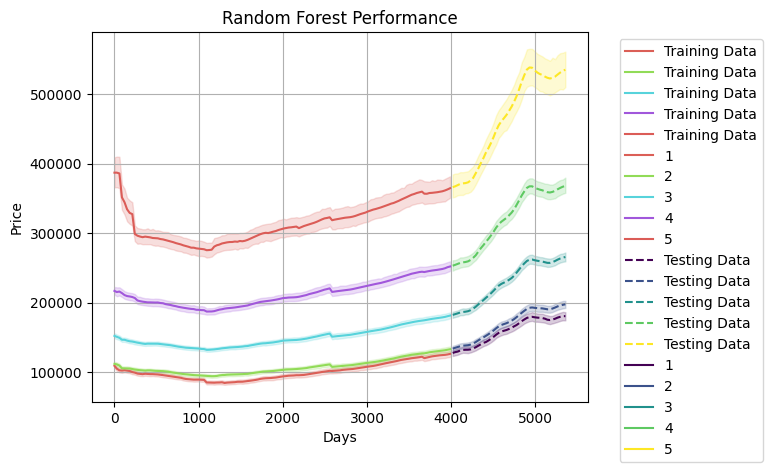

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot training data
sns.lineplot(x=X_train['Days'], y=y_train,hue=X_train['Bedrooms'],palette='hls', color='blue', label='Training Data')

# Plot testing data
sns.lineplot(x=X_test['Days'], y=y_test,hue=X_test['Bedrooms'], palette='viridis',linestyle='dashed', color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=45), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


KeyboardInterrupt: ignored

## Random Forest w/ Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
#defining x and y variables for training the dataset
X = melted_df[['State','Bedrooms', 'Days']]
y = melted_df['Price']

# Splitting the data into training and testing sets using the split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model for Random Forest Regresson and transforming and using the prediction function
rf_model = RandomForestRegressor(n_estimators=150, random_state=45)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Squared Error (Random Forest): 28046252459.367916
R-squared (Random Forest): 0.3381447615166676
Mean Absolute Error (Random Forest): 65894.15672661869


In [ ]:
y_pred2 = rf_model.predict(X_test)
df_prediction2=pd.DataFrame({'Days': X_test['Days'],'Actual':y_test, 'Predicted':y_pred2})

In [ ]:
y_pred2

array([208875.72692933,  95389.66471091, 259732.33980802, ...,
       161008.81251886,  99384.20928943, 193538.47044111])

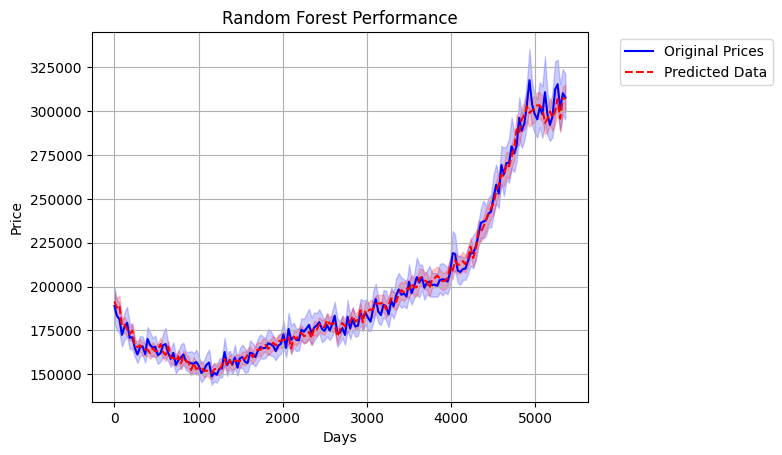

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot training data
sns.lineplot(x=df_prediction2['Days'], y=y_test, color='blue', label='Original Prices')

# Plot testing data
sns.lineplot(x=df_prediction2['Days'], y=y_pred2,linestyle='dashed', color='red', label='Predicted Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


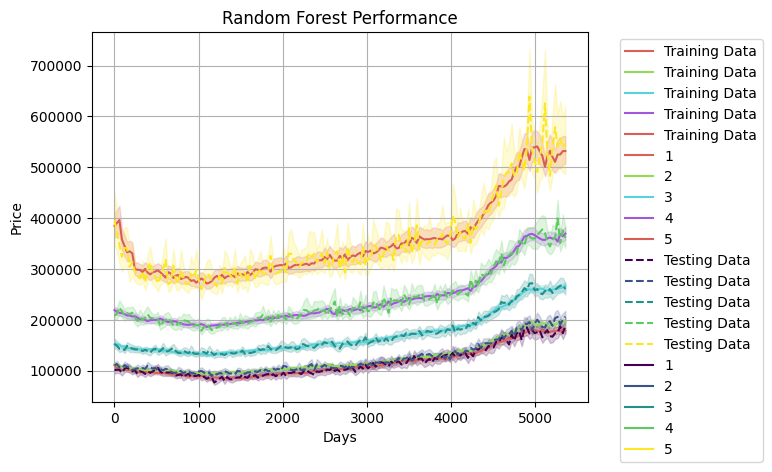

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot training data
sns.lineplot(x=X_train['Days'], y=y_train,hue=X_train['Bedrooms'],palette='hls', color='blue', label='Training Data')

# Plot testing data
sns.lineplot(x=X_test['Days'], y=y_test,hue=X_test['Bedrooms'], palette='viridis',linestyle='dashed', color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Example: Predicting prices for the year 2024
new_data = pd.DataFrame({
    'State': ['GA'],
    'Bedrooms': [3],
    'Days': [10000]
})

# Apply label encoding if 'State' is categorical
# You should use the same label encoder used during training
new_data['State'] = label_encoder.transform(new_data['State'])

# Make predictions
predicted_prices_2024 = rf_model.predict(new_data)

print(predicted_prices_2024)


[230098.03540783]


In [ ]:
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)
y_pred_train = rf_model.predict(X_train)
print("Training Set R^2:", r2_score(y_train, y_pred_train))


Feature Importances: [0.39627696 0.39681007 0.20691297]
Training Set R^2: 0.3874858565784781


In [ ]:
print(rf_model.predict([[16,5,6500]])[0])
#State number, bedrooms, number of days since Jan 1 2009

277470.26269062574


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
def predict_future_price(date):
  from datetime import datetime
  date=datetime.strptime(date, "%Y-%m-%d")
  days = (date - melted_df['Date'].min()).days
  state = melted_df['State'].iloc[-1]
  bedrooms = melted_df['Bedrooms'].iloc[-1]
  print(bedrooms)
  print(state)
  # Add additional time-dependent features (modify based on your model)
  # ...

  # Create a DataFrame with features for prediction
  future_data = pd.DataFrame({
      'State': [state],
      'Bedrooms': [bedrooms],
      'Days': [days],
      # ... add other features ...
  })

  # Predict the price using the model
  predicted_price = rf_model.predict(future_data)[0]

  return predicted_price
predict_future_price('2027-10-01')

5
16


147461.66933057207

In [ ]:
# Function to predict house price for a specific RegionID, Bedrooms, and Date
def predict_house_price(region_id, bedrooms, date):
    days = (date - melted_df['Date'].min()).days

    # Encoding the State for the given RegionID if it's not seen during training
    state = melted_df[melted_df['RegionID'] == region_id]['State']
    state_label  =  state.unique()[0]

    input_data = [[state_label, bedrooms, days]]
    predicted_price = rf_model.predict(input_data)[0]
    return predicted_price

# Example usage of the function
region_id = 464  # Replace with the desired RegionID
bedrooms = 3  # Replace with the number of bedrooms
date_to_predict = pd.to_datetime('2026-07-01')  # Replace with the desired date
predicted_price = predict_house_price(region_id, bedrooms, date_to_predict)
print(f"Predicted price for RegionID {region_id}, {bedrooms} bedrooms, on {date_to_predict}: ${predicted_price:.2f}")

Predicted price for RegionID 464, 3 bedrooms, on 2026-07-01 00:00:00: $133374.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
df_temp =  df[df['RegionID']==464]
df_temp
melted_df_temp = pd.melt(df_temp, id_vars=['RegionID', 'State', 'Bedrooms'], var_name='Date', value_name='Price')


df_t =  melted_df_temp.copy()



df_test  =  df_t[df_t['Date'] > '2020-12-31']

df_test['predicted'] = 0
for i in range(len(df_test)):
  df_test['predicted'][i] =  predict_house_price(df_test['RegionID'][i], df_test['Bedrooms'][i], df['Date'][i])


df_test['predicted']

In [ ]:
df_temp = df[df['RegionID'] == 464]
melted_df_temp = pd.melt(df_temp, id_vars=['RegionID', 'State', 'Bedrooms'], var_name='Date', value_name='Price')
df_t = melted_df_temp.copy()

df_test = df_t.copy()
df_test['predicted'] = 0

for i in range(len(df_test)):
    df_test['predicted'].iloc[i] = predict_house_price(df_test['RegionID'].iloc[i], df_test['Bedrooms'].iloc[i], pd.to_datetime(df_test['Date'].iloc[i]))

print(df_test['predicted'])

In [ ]:
df_test.to_csv('temp.csv')

In [ ]:
# Example usage of the function
region_id = 315  # Replace with the desired RegionID
bedrooms = 4  # Replace with the number of bedrooms
date_to_predict = pd.to_datetime('2024-01-01')  # Replace with the desired date
predicted_price = predict_house_price(region_id, bedrooms, date_to_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


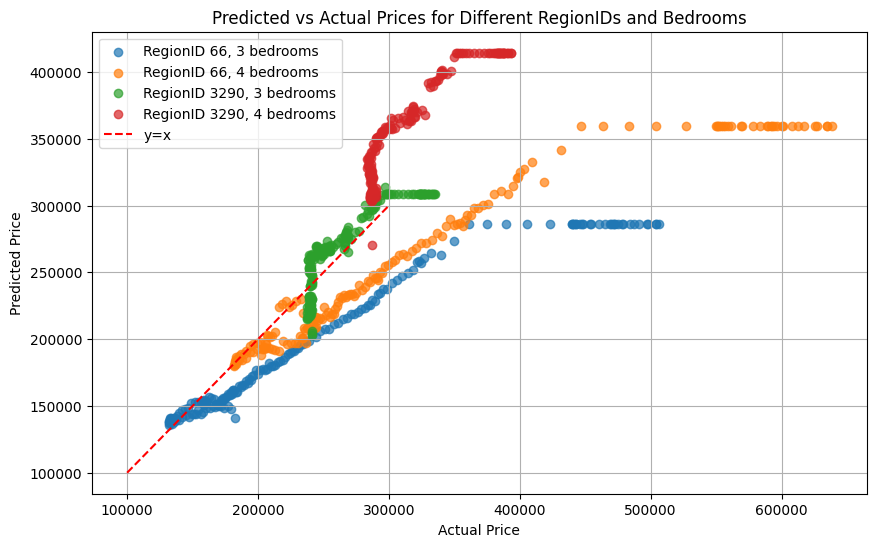

In [ ]:
import matplotlib.pyplot as plt

# Function to plot predicted vs actual values for different RegionIDs and Bedrooms
def plot_predicted_vs_actual(region_ids, bedrooms):
    plt.figure(figsize=(10, 6))

    for region_id in region_ids:
        for bedroom in bedrooms:
            # Selecting data for a specific RegionID and Bedrooms
            data_subset = melted_df[(melted_df['RegionID'] == region_id) & (melted_df['Bedrooms'] == bedroom)]

            # Predicting prices
            days = (data_subset['Date'] - melted_df['Date'].min()).dt.days
            X_subset = pd.DataFrame({'State': data_subset['State'], 'Bedrooms': data_subset['Bedrooms'], 'Days': days})
            predicted_prices = rf_model.predict(X_subset)

            # Plotting predicted vs actual values
            plt.scatter(data_subset['Price'], predicted_prices, label=f'RegionID {region_id}, {bedroom} bedrooms', alpha=0.7)

    plt.xlabel('Actual Price')
    plt.plot([100000, 300000], [100000, 300000], color='red', linestyle='--', label='y=x')
    plt.ylabel('Predicted Price')
    plt.title('Predicted vs Actual Prices for Different RegionIDs and Bedrooms')
    plt.legend()
    plt.grid(True)
    plt.show()
# Define RegionIDs and Bedrooms for plotting
region_ids_to_plot = [66, 3290]  # Replace with desired RegionIDs
bedrooms_to_plot = [3, 4]  # Replace with desired Bedrooms

# Call the function to plot predicted vs actual values
plot_predicted_vs_actual(region_ids_to_plot, bedrooms_to_plot)


In [ ]:
import matplotlib.pyplot as plt

# Collect actual and predicted prices for different RegionIDs and bedrooms
predictions = pd.DataFrame({'RegionID': X_test['RegionID'], 'Bedrooms': X_test['Bedrooms'], 'Date': X_test['Date'], 'ActualPrice': y_test, 'PredictedPrice': y_pred_rf})

# Group by RegionID and Bedrooms
grouped_data = predictions.groupby(['RegionID', 'Bedrooms'])

# Plot actual vs predicted prices for each group
plt.figure(figsize=(12, 8))

for group, data in grouped_data:
    region_id, bedrooms = group
    plt.scatter(data['Date'], data['ActualPrice'], label=f"RegionID: {region_id}, Bedrooms: {bedrooms} (Actual)", marker='o')
    plt.scatter(data['Date'], data['PredictedPrice'], label=f"RegionID: {region_id}, Bedrooms: {bedrooms} (Predicted)", marker='x')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for Different RegionIDs and Bedrooms')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Melting the dataframe to transform dates into rows and transpose such that there will be only 3 columns which are
# 1. RegionID
# 2. Date
# 3. Price
melted_df = pd.melt(df, id_vars=['State', 'Bedrooms'], var_name='Date', value_name='Price')

# Standarizing the date to a standard format
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Encoding RegionID using LabelEncoder
label_encoder = LabelEncoder()
melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

# Converting Date to numerical format bu replacing it with number of days since the start date which is jan 2009
melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days


#defining x and y variables for training the dataset
X = melted_df[['State','Bedrooms', 'Days']]
y = melted_df['Price']

# Splitting the data into training and testing sets using the split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model for Random Forest Regresson and transforming and using the prediction function
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

In [ ]:
print(melted_df.shape)


In [ ]:
print(61313.014702930355/(melted_df.shape[0]*0.2))

In [ ]:
print(df.columns)

### MultiVarate Regression with gradient descent

In [ ]:
import numpy as np

# Define the function to be minimized (Mean Squared Error)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the gradient descent algorithm for multivariable non-linear regression
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for _ in range(n_iterations):
        # Calculate the predicted values
        z = X.dot(theta)
        y_pred = sigmoid(z)

        # Calculate the gradient of the loss function
        gradient = -2 * X.T.dot(y - y_pred)

        # Update the weights
        theta -= learning_rate * gradient

    return theta

# Define the feature matrix and target vector
X = np.array(melted_df[['State', 'Bedrooms', 'Days']])
y = np.array(melted_df['Price'])

# Initialize the weights and hyperparameters
theta = np.zeros(X.shape[1])
learning_rate = 0.05
n_iterations = 3000

# Train the model using gradient descent
theta_optimal = gradient_descent(X, y, theta, learning_rate, n_iterations)

# Make predictions
y_pred = sigmoid(X.dot(theta_optimal))

# Calculate the Mean Squared Error
mse_gd = mse(y, y_pred)

# Print the MSE
print(f'Mean Squared Error (Gradient Descent): {mse_gd}')


In [ ]:
mae_gd = mean_absolute_error(y, y_pred)
print(f'Absolute Squared Error (Gradient Descent): {mae_gd}')

In [ ]:
print(melted_df['Days'].unique())

### Normalization

In [ ]:
# prompt: give me the code to normalize the prices in columns 2 to 179 in the df using max min module
df_copy=df.copy()
df.iloc[:,2:179] = df.iloc[:,2:179].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Melting the dataframe to transform dates into rows and transpose such that there will be only 3 columns which are
# 1. RegionID
# 2. Date
# 3. Price
melted_df = pd.melt(df, id_vars=['State', 'Bedrooms'], var_name='Date', value_name='Price')

# Standarizing the date to a standard format
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Encoding RegionID using LabelEncoder
label_encoder = LabelEncoder()
melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

label_encoder_2 = LabelEncoder()
melted_df['Bedrooms'] = label_encoder_2.fit_transform(melted_df['Bedrooms'])

# Converting Date to numerical format bu replacing it with number of days since the start date which is jan 2009
melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days


#defining x and y variables for training the dataset
X = melted_df[['State','Bedrooms', 'Days']]
y = melted_df['Price']

# Splitting the data into training and testing sets using the split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model for Random Forest Regresson and transforming and using the prediction function
rf_model = RandomForestRegressor(n_estimators=1000, random_state=41)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

### Line Plots (Years Vs State)

In [ ]:
states = label_encoder.classes_
state_values = dict(enumerate(states))

print(f"State Values: {state_values}")

State Values: {0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'RI', 40: 'SC', 41: 'SD', 42: 'TN', 43: 'TX', 44: 'UT', 45: 'VA', 46: 'VT', 47: 'WA', 48: 'WI', 49: 'WV', 50: 'WY'}


### Line Plot with house prices vs Years w/ Bedrooms

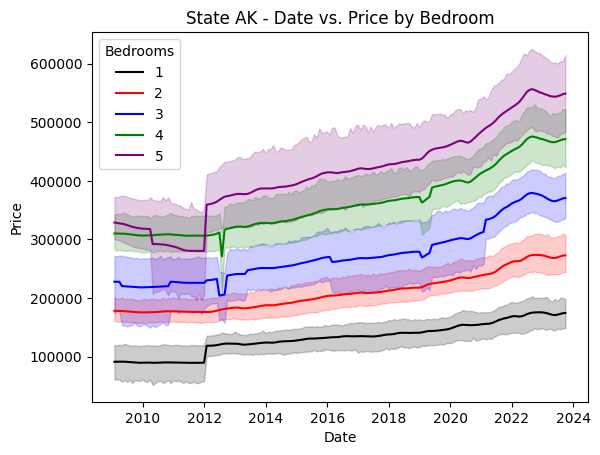

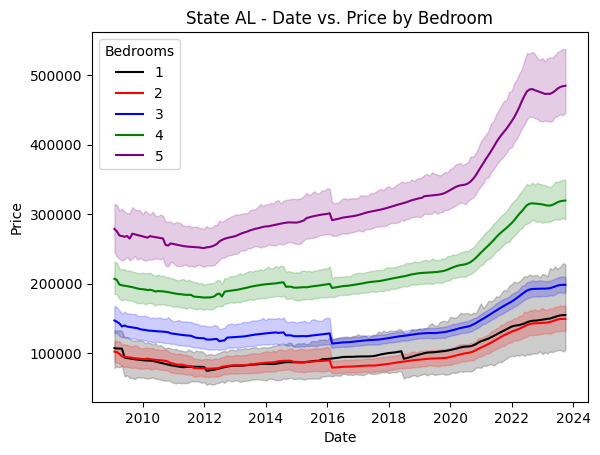

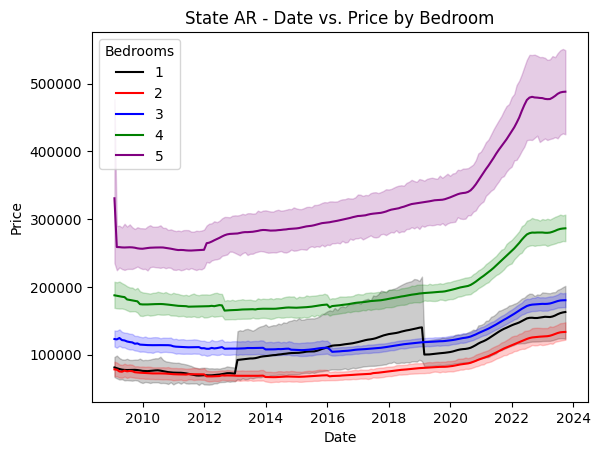

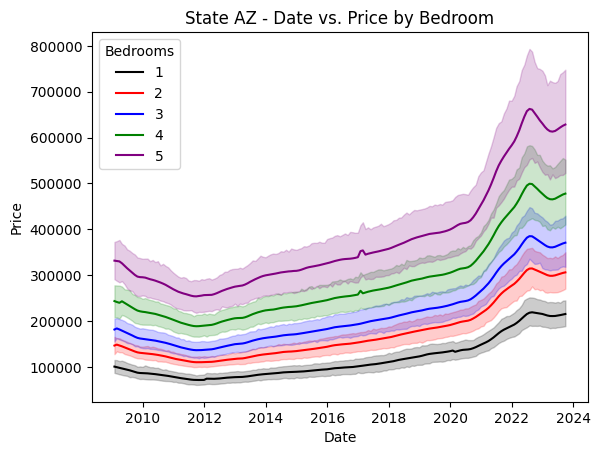

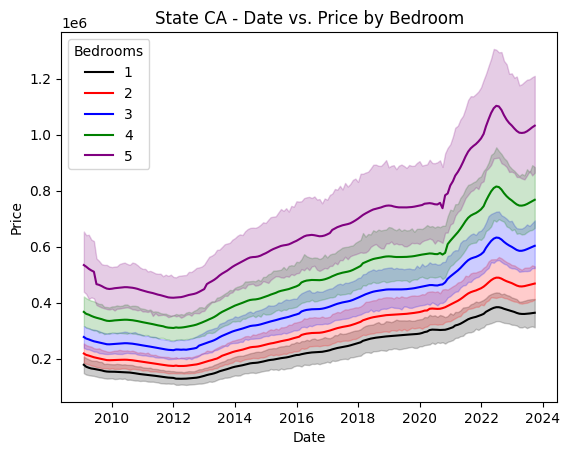

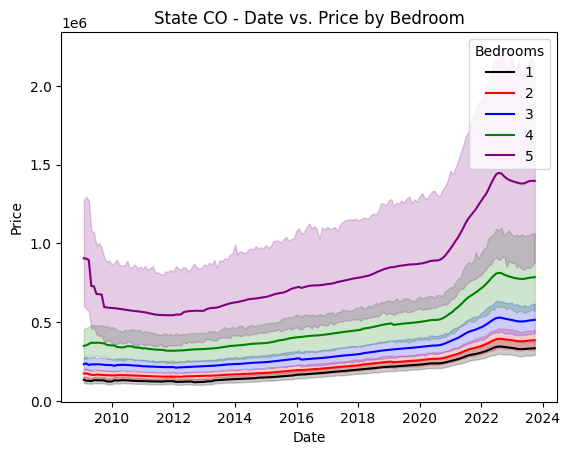

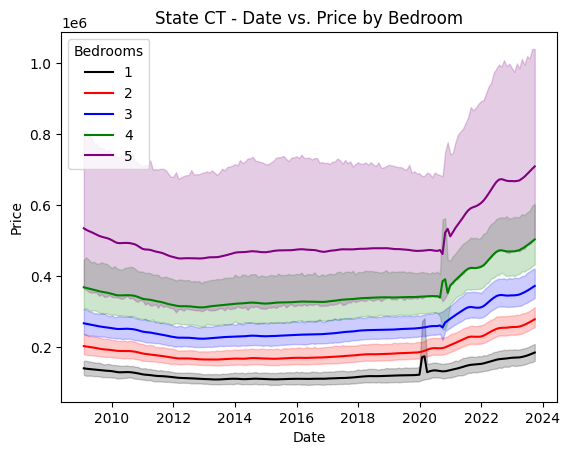

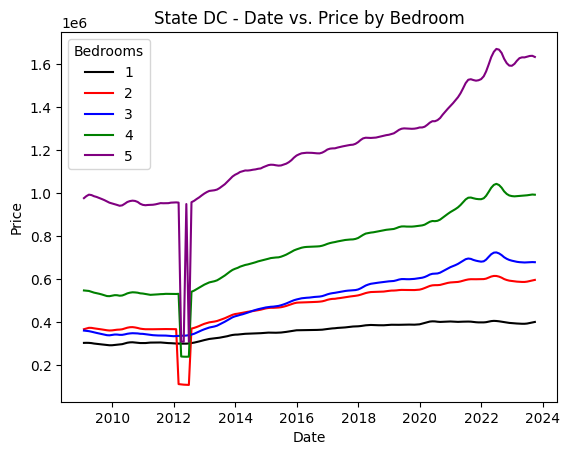

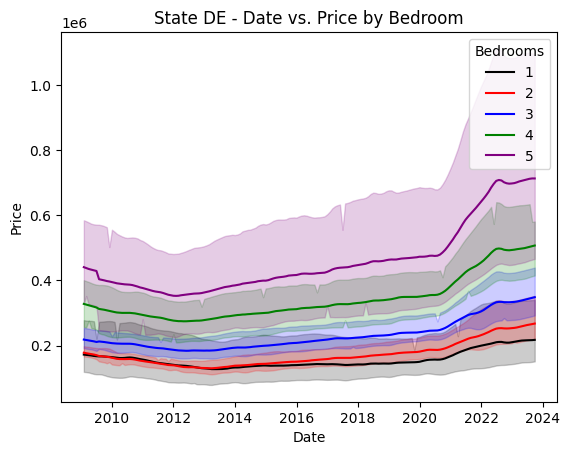

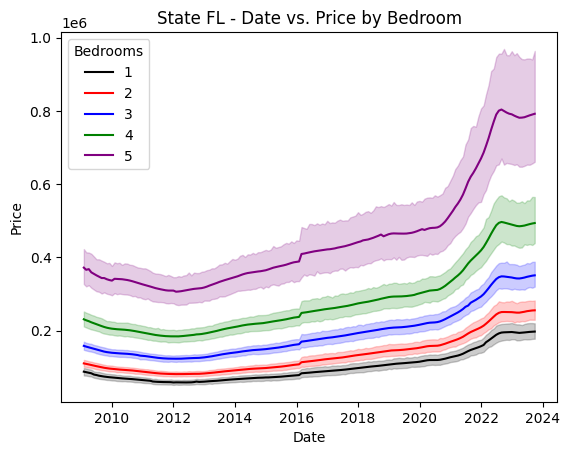

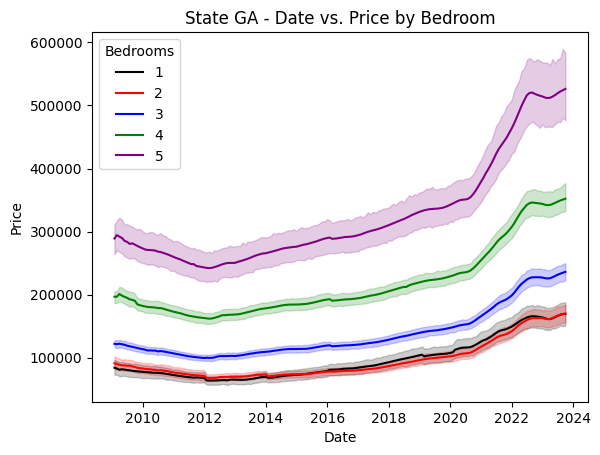

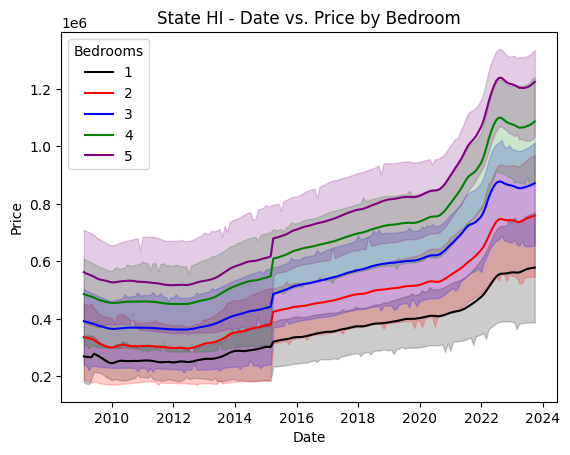

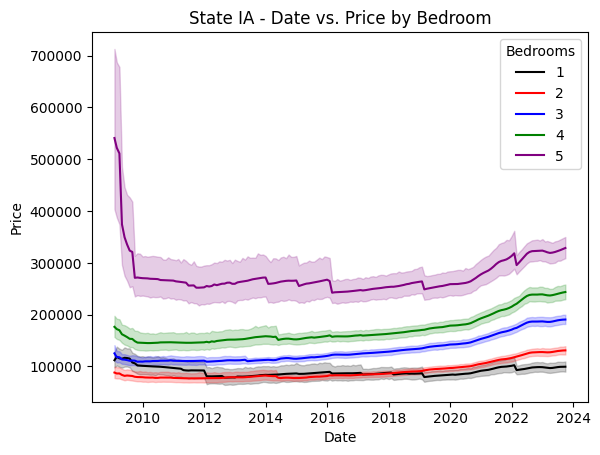

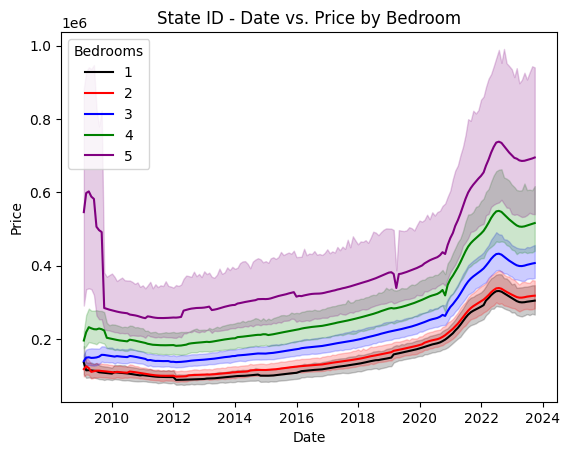

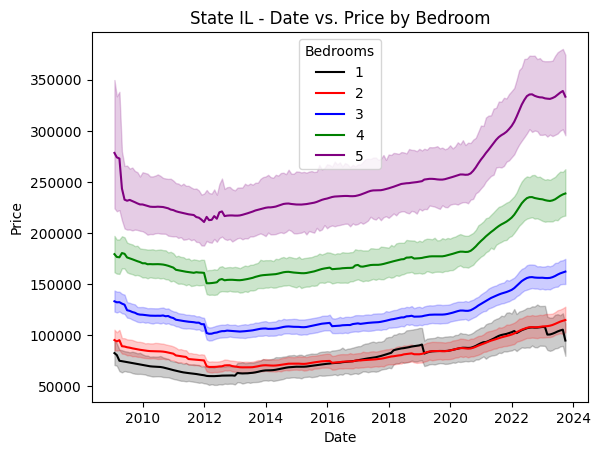

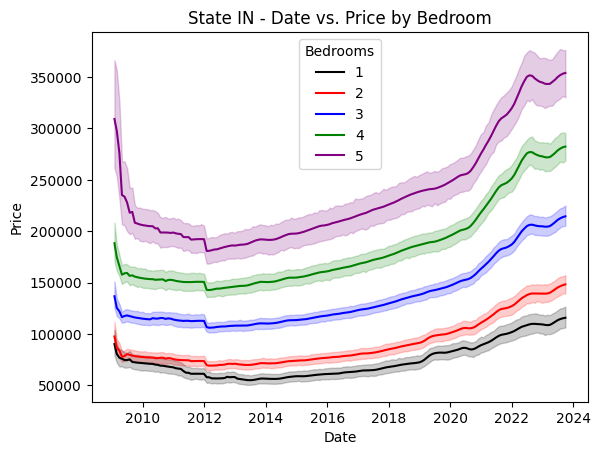

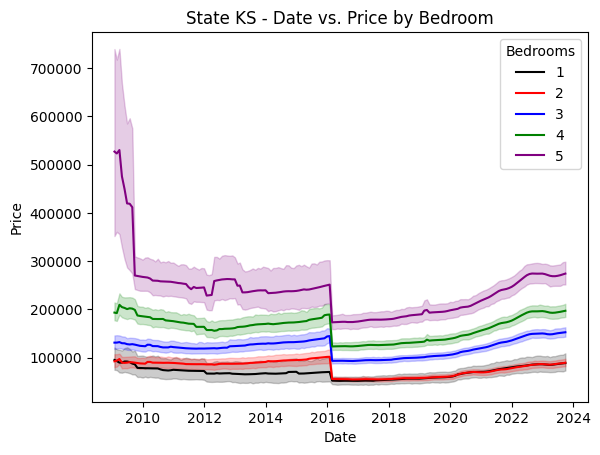

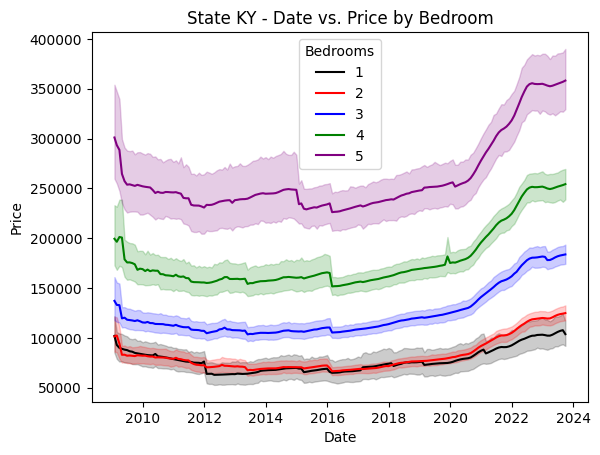

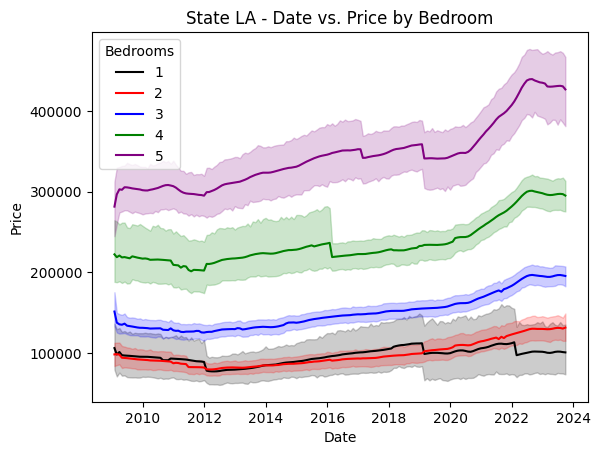

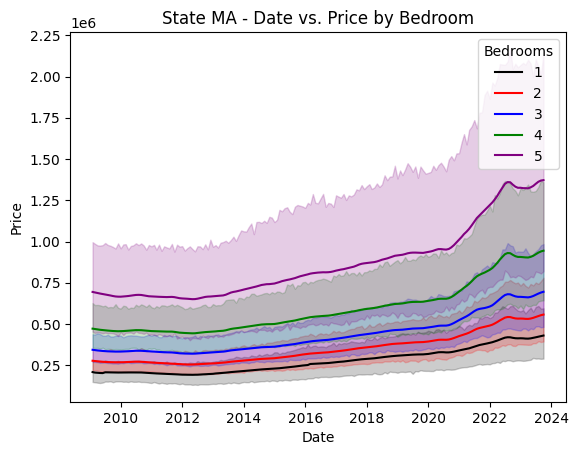

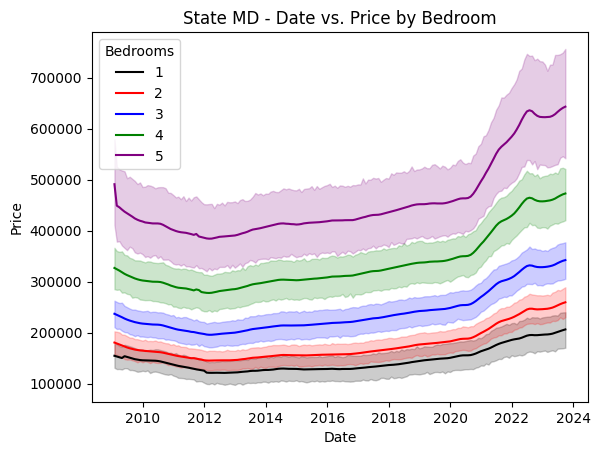

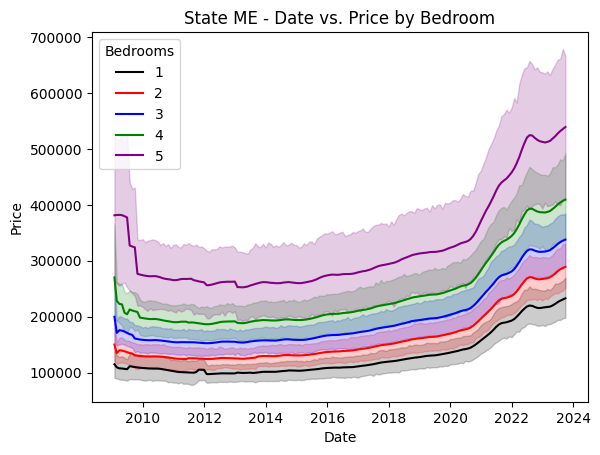

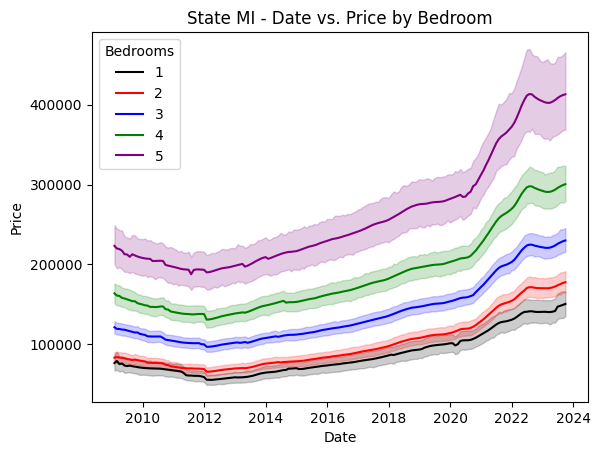

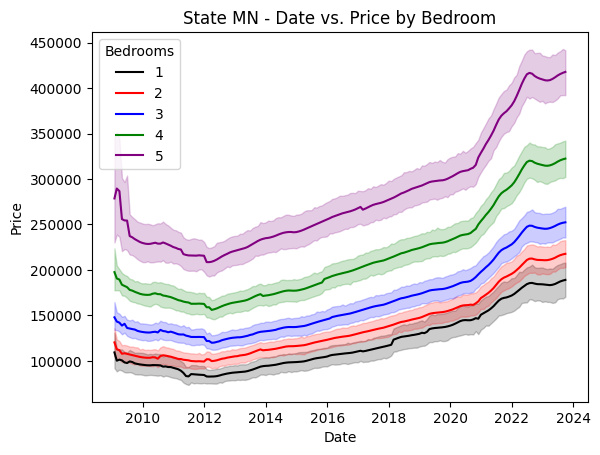

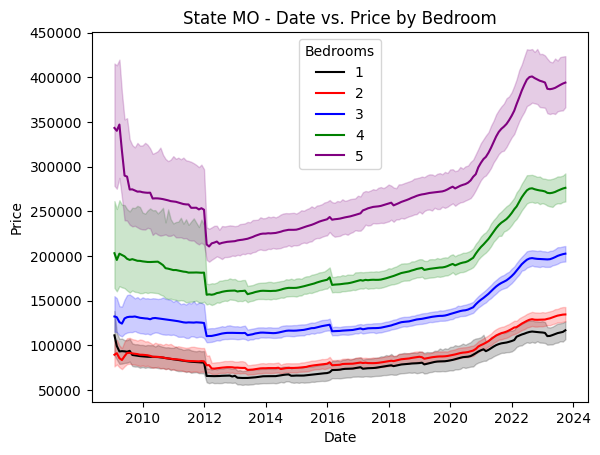

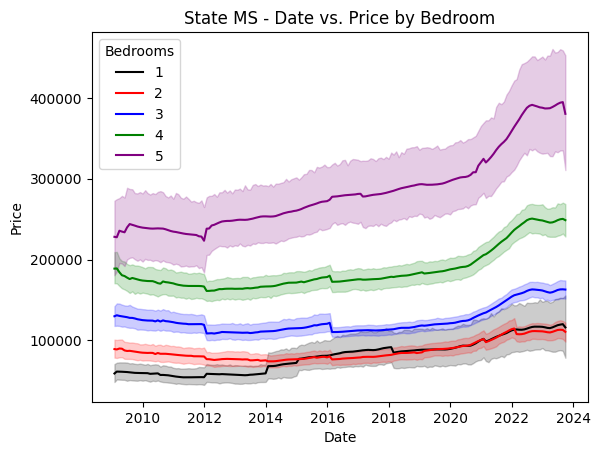

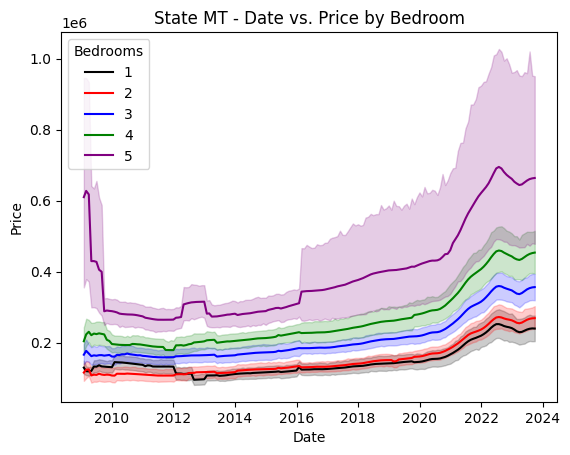

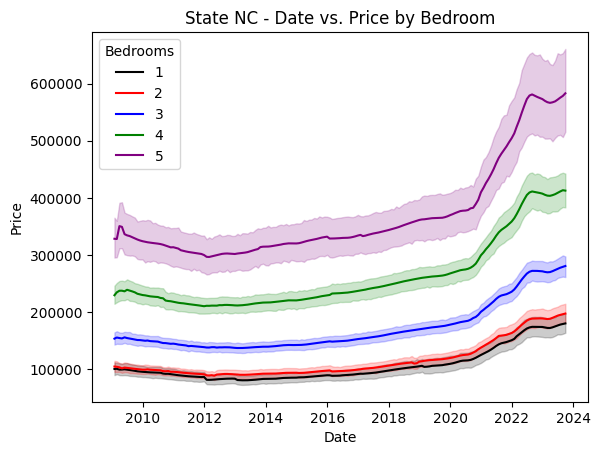

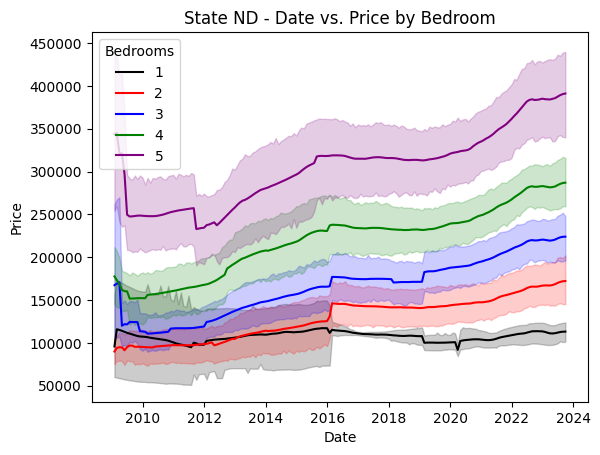

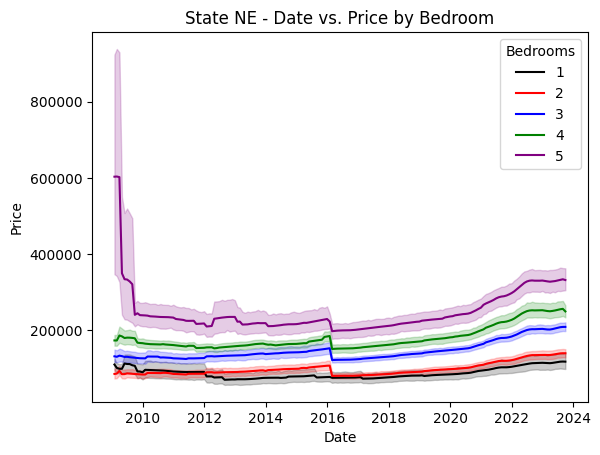

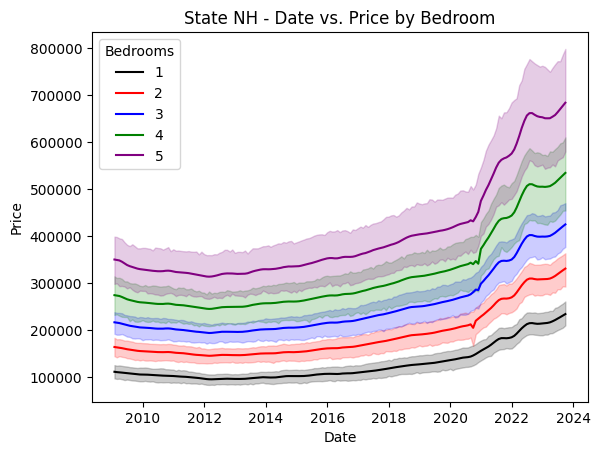

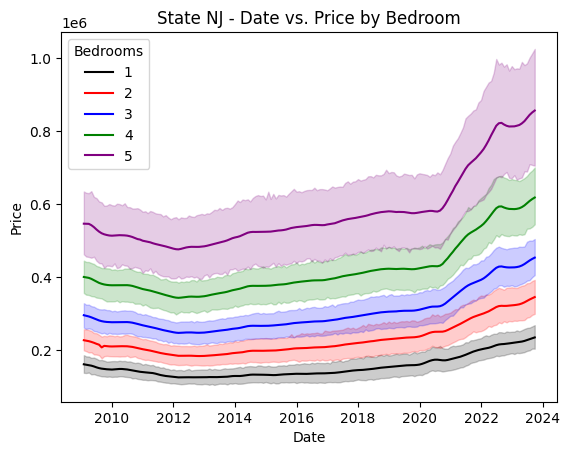

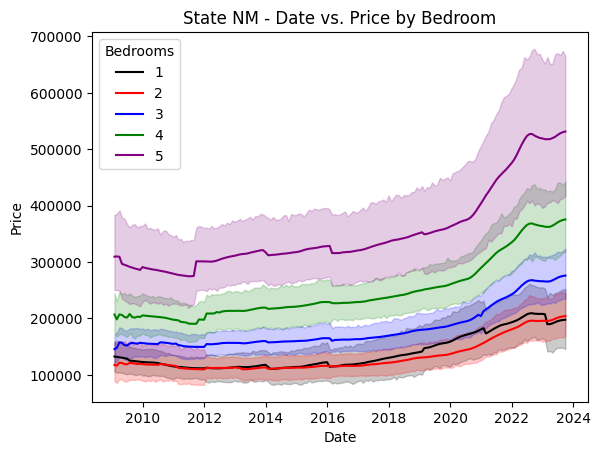

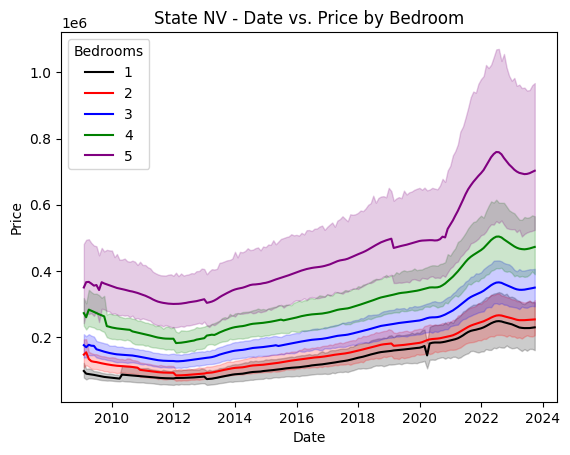

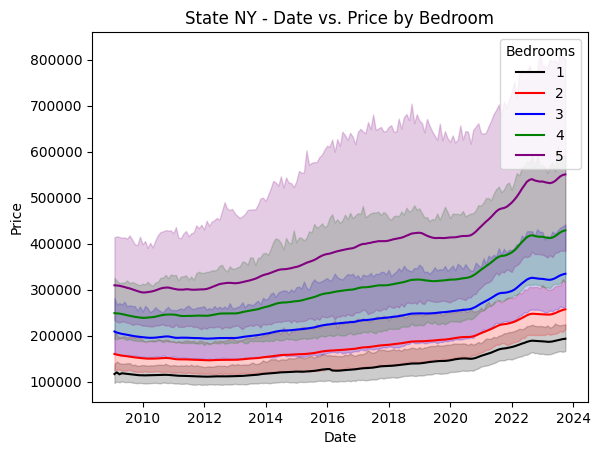

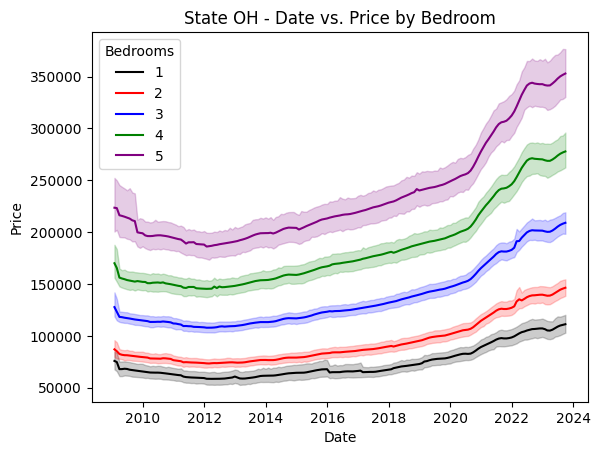

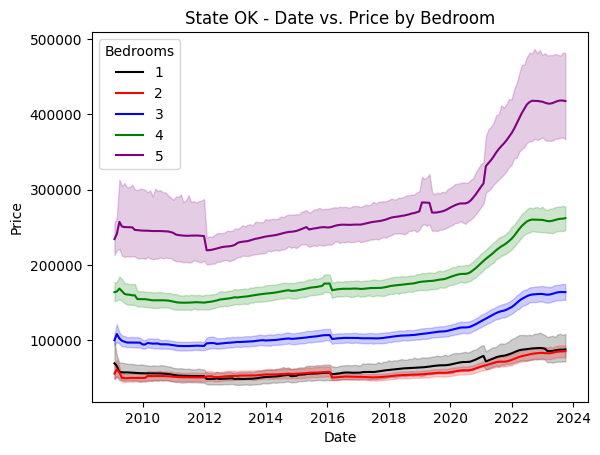

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate scatter plot and SPLOM for a state
def plot_state(state_number):
    state_df = melted_df[melted_df['State'] == state_number]

    # Scatter plot between Bedrooms and Price
    # sns.scatterplot(x="Bedrooms", y="Price", data=state_df)
    # plt.xlabel("Bedrooms")
    # plt.ylabel("Price")
    # plt.title(f"State {state_number} - Bedrooms vs. Price")
    # plt.show()

    # Scatter plot between Date and Price
    colors = {1: "black",2: "red", 3: "blue", 4: "green", 5: "purple"}
    sns.lineplot(x="Date", y="Price",hue="Bedrooms",palette=colors,  data=state_df)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"State {state_values[state_number]} - Date vs. Price by Bedroom")
    plt.show()

# Loop through all state numbers (0-50)
for state_number in range(51):
    plot_state(state_number)


In [ ]:
melted_df.to_csv("drive/MyDrive/FDS project/melted_df.csv")

## Imputation with Median of column

In [ ]:
states=df1["State"].unique()
for state in states:
    grouped = df1[df1["State"] == state]
    for date in df1.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df1.update(grouped)
print("Df1 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df1.to_csv('/content/drive/My Drive/FDS project/NoNull_B1_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df2["State"].unique()
for state in states:
    grouped = df2[df2["State"] == state]
    for date in df2.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df2.update(grouped)
    #df=pd.concact([grouped])
print("Df2 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df2.to_csv('/content/drive/My Drive/FDS project/NoNull_B2_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df3["State"].unique()
for state in states:
    grouped = df3[df3["State"] == state]
    for date in df3.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df3.update(grouped)
    #df=pd.concact([grouped])
print("Df3 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df3.to_csv('/content/drive/My Drive/FDS project/NoNull_B3_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df4["State"].unique()
for state in states:
    grouped = df4[df4["State"] == state]
    for date in df4.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df4.update(grouped)
    #df=pd.concact([grouped])
print("Df4 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df4.to_csv('/content/drive/My Drive/FDS project/NoNull_B4_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df5["State"].unique()
for state in states:
    grouped = df5[df5["State"] == state]
    for date in df5.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df5.update(grouped)
    #df=pd.concact([grouped])
print("Df5 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df5.to_csv('/content/drive/My Drive/FDS project/NoNull_B5_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

In [ ]:
states=df1["State"].unique()
for state in states:
    grouped = df1[df1["State"] == state]
    for date in df1.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df1.update(grouped)
print("Df1 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df1.to_csv('/content/drive/My Drive/FDS project/NoNull_B1_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df2["State"].unique()
for state in states:
    grouped = df2[df2["State"] == state]
    for date in df2.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df2.update(grouped)
    #df=pd.concact([grouped])
print("Df2 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df2.to_csv('/content/drive/My Drive/FDS project/NoNull_B2_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df3["State"].unique()
for state in states:
    grouped = df3[df3["State"] == state]
    for date in df3.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df3.update(grouped)
    #df=pd.concact([grouped])
print("Df3 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df3.to_csv('/content/drive/My Drive/FDS project/NoNull_B3_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df4["State"].unique()
for state in states:
    grouped = df4[df4["State"] == state]
    for date in df4.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df4.update(grouped)
    #df=pd.concact([grouped])
print("Df4 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df4.to_csv('/content/drive/My Drive/FDS project/NoNull_B4_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df5["State"].unique()
for state in states:
    grouped = df5[df5["State"] == state]
    for date in df5.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df5.update(grouped)
    #df=pd.concact([grouped])
print("Df5 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df5.to_csv('/content/drive/My Drive/FDS project/NoNull_B5_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")